## Rdkit

Rdkit is an open source toolkit for cheminformatics available as a python library. You can find more information on the rdkit website: https://www.rdkit.org/ 
You will need rdkit installed to the python environment you are using to run this notebook. See the github wiki or the rdkit website for installation instructions. There are more functionalities in rdkit that will be covered in this lesson, see rdkit website or linked resources in the wiki to learn more about rdkit functionality. Some rdkit functionality will also be covered in future lectures. This notebook is adapted from the rdkit book and cookbook: https://www.rdkit.org/docs/RDKit_Book.html and https://www.rdkit.org/docs/Cookbook.html

# Install necessary libraries
You only run this if you do not already have rdkit installed

In [ ]:
%pip install rdkit

## Importing necessary libraries
We will need to import rdkit to run it

In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.ipython_useSVG=True

## SMILES and creating a molecule
SMILES are text based representations of molecules that are frequently used in chemistry datasets. Rdkit can convert smiles to mol objects which can then be used for downstream analysis. If you want to learn more about SMILES, there are several good resources such as https://chemicbook.com/2021/02/13/smiles-strings-explained-for-beginners-part-1.html or https://www.daylight.com/dayhtml/doc/theory/theory.smiles.html but since we will be relying on rdkit to handle smiles, there is no need for you to memorize how smiles work. However if you ever encounter smiles strings that cause an error in rdkit, it can be useful to look up information about smiles to figure out what might be causing the issue. Note that databases such as Pubchem provide smiles strings for various molecules. ChemDraw can also convert between smiles strings and molecule structure and vice versa

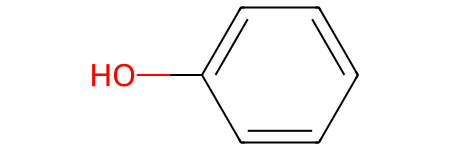

In [2]:
#create phenol molecule from string
mol = Chem.MolFromSmiles("c1cc(O)ccc1")
#visualize molecule
mol
#Look up smiles or get smiles from ChemDraw of your favorite molecule!
#note that rdkit will often struggle to draw more complex structures in a coherent way, use rdCoordGen in these cases (see rdkit docs)

## Substructures
Rdkit allows you to identify substructures and highlight them in molecules. Note that we create our substructure molecules with SMARTS rather than SMILES - SMARTS are like SMILES but for patterns, you can include wild card atoms in SMARTS
For more details on SMARTS see: https://www.daylight.com/dayhtml/doc/theory/theory.smarts.html

carboxylic acid substructure match
()
phenyl substructure match
((0, 1, 2, 4, 5, 6),)


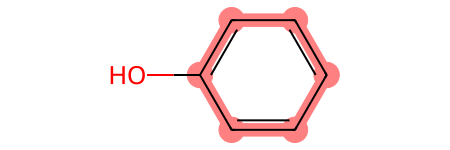

In [3]:
carboxacid_substructure = Chem.MolFromSmarts('C(=O)O')
phenyl_substructure = Chem.MolFromSmarts('c1ccccc1')

#the follwoing will print out numbering of atoms that match the substructure. 
#Try experimenting with the molecule and substructure objects to see what substrctures are found
print("carboxylic acid substructure match")
print(mol.GetSubstructMatches(carboxacid_substructure))
print("phenyl substructure match")
print(mol.GetSubstructMatches(phenyl_substructure))

#displaying the molecule object afeter doing a substructure search will highlight atoms in the substructure
mol

## Getting atom properties
Rdkit allows you to iterate through atoms in a molecule and get various properties, here are some properites that are available, there these are not exhaustive

In [4]:
print("atom index, atomic number, symbiol, hybridization, mass, aromaticity")
#for loop to iterate through atoms
for x in mol.GetAtoms():
    print(x.GetIdx(), x.GetAtomicNum(), x.GetSymbol(), x.GetHybridization(), x.GetMass(),x.GetIsAromatic())

atom index, atomic number, symbiol, hybridization, mass, aromaticity
0 6 C SP2 12.011 True
1 6 C SP2 12.011 True
2 6 C SP2 12.011 True
3 8 O SP2 15.999 False
4 6 C SP2 12.011 True
5 6 C SP2 12.011 True
6 6 C SP2 12.011 True


## Getting molecule properties
Rdkit can also calculate some properties of the overall molecule, these are also referred to as descriptors

In [5]:
from rdkit.Chem import Descriptors
#here are some useful descriptors, try changing the molecule and checking the output of these descriptors
print("LogP - prediction of octanol/water partition")
print(Descriptors.MolLogP(mol))
print("Molecular Weight")
print(Descriptors.MolWt(mol))
print("H bond acceptors")
print(Descriptors.NumHAcceptors(mol))
print("H bond donors")
print(Descriptors.NumHDonors(mol))
print("Num aromatic rings")
print(Descriptors.NumAromaticRings(mol))
print("Topological polar surface area")
print(Descriptors.TPSA(mol))

LogP - prediction of octanol/water partition
1.3921999999999999
Molecular Weight
94.11299999999997
H bond acceptors
1
H bond donors
1
Num aromatic rings
1
Topological polar surface area
20.23


## Fingerprints and Tanimoto similarity
Fingerprints are bit vectors that represent the molecule - the molecule is broken into small substructures using a defined algorithm and then these substructures are run through a hashing function - which will convert them to a number. If a molecule contains a certain substructure there will be a 1 for the position corresponding to the hash and 0 if not. Note that sometimes two or more substructures may give the same hash (even if they are dissimilar substructures), in that case ther will be a 1 if the molecule contains any of the substructures corresponding to that hash, however this should only rarely occur.

There are different types of fingerprints that can lead to different results. Some might be better for different applications. Some common ones include the Daylight Fingerprints (https://www.daylight.com/dayhtml/doc/theory/theory.finger.html) and Morgan Fingerprints and related Extended-connectivity fingerprints (ECFPs) (https://pubs.acs.org/doi/abs/10.1021/ci100050t). RDkit also has it's own fingerprint which is more similar to Daylight. Note that Rdkit has it's own implementation of these fingerprints that might differ slightly from other software that can calculate fingerprints.

Fingerprints can then be used to compare similarity of compounds, a common way to do that is the Tanimoto similarity: https://jcheminf.biomedcentral.com/articles/10.1186/s13321-015-0069-3
Tanimoto similarity ranges from 0 to 1, with 1 being more similar.

In [6]:
from rdkit.Chem import AllChem
from rdkit import DataStructs

#fingerprint generator for rdkit type fingerprints
fpgen = AllChem.GetRDKitFPGenerator()
fpgen_morgan = AllChem.GetMorganGenerator(radius=2) #note you can set the radius, 2 is the standard, see ECFP paper above to learn what this means

#how to calculate some of the differen fingerprint types described above
mol1_fp = fpgen.GetFingerprint(mol)
mol1_fp_morgan = fpgen_morgan.GetFingerprint(mol)

#let's do the same thing for a second molecule so we can calculate Tanimoto similarities, lets use benzene
mol2 = Chem.MolFromSmiles("c1ccccc1")
mol2_fp = fpgen.GetFingerprint(mol2)
mol2_fp_morgan = fpgen_morgan.GetFingerprint(mol2)

#you can experiment with your own molecule pairs
print("Tanimoto for RDkit fingerprints")
print(DataStructs.TanimotoSimilarity(mol1_fp, mol2_fp))
print("Tanimoto for Morgan fingerprints")
print(DataStructs.TanimotoSimilarity(mol1_fp_morgan, mol2_fp_morgan))

Tanimoto for RDkit fingerprints
0.3157894736842105
Tanimoto for Morgan fingerprints
0.2727272727272727
